In [2]:
import sys
base_path = '/notebooks/eipi10/python-book/arsenal'
sys.path.append(base_path)

from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import eipi10.ml.linear_model as lm
from eipi10.ml.planar_utils import *
from eipi10.ml.utils import *
from eipi10.ml.predictor import ClassificationPredictor, EvaluateCurve

reload(lm)
%matplotlib inline
pd.set_option('display.width', 100)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Image Data

load /notebooks/eipi10/python-book/arsenal/data/train_catvnoncat.h5
load /notebooks/eipi10/python-book/arsenal/data/test_catvnoncat.h5
(209, 64, 64, 3) (209, 1) (50, 64, 64, 3) (50, 1)
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_X_orig shape: (209, 64, 64, 3)
train_Y_orig shape: (209, 1)
test_X_orig shape: (50, 64, 64, 3)
test_Y_orig shape: (50, 1)
train_X shape: (12288, 209)
train_Y shape: (1, 209)
test_X shape: (12288, 50)
test_Y shape: (1, 50)


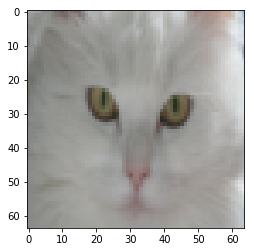

In [4]:
train_X_orig, train_Y_orig, test_X_orig, test_Y_orig, classes = load_image_data(
    train_data_path=base_path+'/data/train_catvnoncat.h5', test_data_path=base_path+'/data/test_catvnoncat.h5')
print(train_X_orig.shape, train_Y_orig.shape, test_X_orig.shape, test_Y_orig.shape)
plt.imshow(train_X_orig[50])

m_train = train_X_orig.shape[0]
m_test = test_X_orig.shape[0]
num_px = train_X_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_X_orig shape: " + str(train_X_orig.shape))
print ("train_Y_orig shape: " + str(train_Y_orig.shape))
print ("test_X_orig shape: " + str(test_X_orig.shape))
print ("test_Y_orig shape: " + str(test_Y_orig.shape))

train_X, train_Y = initialize_image_data(train_X_orig, train_Y_orig)
test_X, test_Y = initialize_image_data(test_X_orig, test_Y_orig)

print ("train_X shape: " + str(train_X.shape))
print ("train_Y shape: " + str(train_Y.shape))
print ("test_X shape: " + str(test_X.shape))
print ("test_Y shape: " + str(test_Y.shape))

INFO: Cost after epoch 0: 0.6931471806
INFO: Cost after epoch 100: 0.5845083637
INFO: Cost after epoch 200: 0.4669490409
INFO: Cost after epoch 300: 0.3760068669
INFO: Cost after epoch 400: 0.3314632893
INFO: Cost after epoch 500: 0.3032730675
INFO: Cost after epoch 600: 0.2798795866
INFO: Cost after epoch 700: 0.2600421369
INFO: Cost after epoch 800: 0.2429406847
INFO: Cost after epoch 900: 0.2280042226
INFO: Cost after epoch 1000: 0.2148195138
INFO: Cost after epoch 1100: 0.2030781906
INFO: Cost after epoch 1200: 0.1925442772
INFO: Cost after epoch 1300: 0.1830333380
INFO: Cost after epoch 1400: 0.1743985944
INFO: Cost after epoch 1500: 0.1665213971
INFO: Cost after epoch 1600: 0.1593045183
INFO: Cost after epoch 1700: 0.1526673247
INFO: Cost after epoch 1800: 0.1465422350
INFO: Cost after epoch 1900: 0.1408720757
INFO: Final Cost after epoch 2000: 0.1356080753


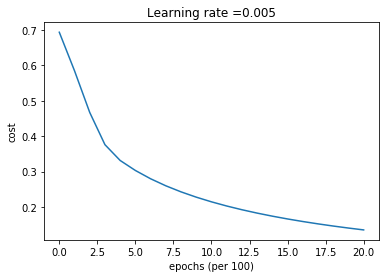

       accuracy      cost    recall  precision  specificity        f1  tp  fn  fp   tn
train  0.990431  0.135608  0.986111   0.986111     0.992701  0.986111  71   1   1  136
dev    0.700000  0.750429  0.696970   0.821429     0.705882  0.754098  23  10   5   12


In [5]:
reload(lm)
model = lm.LogisticRegression(num_features=train_X.shape[0], activator=Sigmoid,
                              regularizer=Regularizer(), iterator=NumberIterator(2000), 
                              optimizer=GradientOptimizer(0.005), initializer=WeightInitializer(),
                              keep_cost_num_epoch=100)

model.fit(train_X, train_Y, print_cost=True, print_num_epoch=100)   

model.plot_costs()
predictor = ClassificationPredictor(model)
predictor.print_metrics(train_X, train_Y, test_X, test_Y)


Cost after iteration 0: 0.693147  
Cost after iteration 100: 0.584508  
Cost after iteration 200: 0.466949  
Cost after iteration 1700: 0.152667  
Cost after iteration 1800: 0.146542  
Cost after iteration 1900: 0.140872  
train_accuracy = 0.99043062201  
test_accuracy = 0.7  

上面的结果显示，模型overfitting了。下面引入L2正则项。

INFO: Cost after epoch 0: 0.6931471806
INFO: Cost after epoch 100: 0.6463040532
INFO: Cost after epoch 200: 0.6157951941
INFO: Cost after epoch 300: 0.6053841105
INFO: Cost after epoch 400: 0.6013870396
INFO: Cost after epoch 500: 0.5997235774
INFO: Cost after epoch 600: 0.5989866757
INFO: Cost after epoch 700: 0.5986451701
INFO: Cost after epoch 800: 0.5984828912
INFO: Cost after epoch 900: 0.5984059068
INFO: Cost after epoch 1000: 0.5983710817
INFO: Cost after epoch 1100: 0.5983577042
INFO: Cost after epoch 1200: 0.5983554772
INFO: Cost after epoch 1300: 0.5983591420
INFO: Cost after epoch 1400: 0.5983659576
INFO: Cost after epoch 1500: 0.5983744718
INFO: Cost after epoch 1600: 0.5983839058
INFO: Cost after epoch 1700: 0.5983938373
INFO: Cost after epoch 1800: 0.5984040357
INFO: Cost after epoch 1900: 0.5984143737
INFO: Final Cost after epoch 2000: 0.5984247809


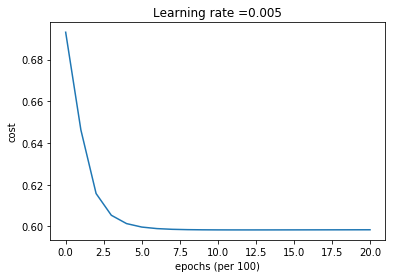

       accuracy      cost    recall  precision  specificity        f1  tp  fn  fp  tn
train  0.755981  0.514335  0.972222   0.588235     0.642336  0.732984  70   2  49  88
dev    0.820000  0.505256  0.909091   0.833333     0.647059  0.869565  30   3   6  11


In [6]:
reload(lm)
model = lm.LogisticRegression(num_features=train_X.shape[0], activator=Sigmoid,
                              regularizer=L2Regularizer(200), iterator=NumberIterator(2000), 
                              optimizer=GradientOptimizer(0.005), initializer=WeightInitializer(),
                              keep_cost_num_epoch=100)

model.fit(train_X, train_Y, print_cost=True, print_num_epoch=100)   

model.plot_costs()
predictor = ClassificationPredictor(model)
predictor.print_metrics(train_X, train_Y, test_X, test_Y)

下面的结果是之前的结果，不知道哪里出了一点错误，是以前错，还是现在错。  
Cost after iteration 0: 0.693147   
Cost after iteration 100: 0.646305      
Cost after iteration 200: 0.615790     
Cost after iteration 300: 0.605371  
Cost after iteration 400: 0.601365    
Cost after iteration 500: 0.599691    
Cost after iteration 600: 0.598944  
Cost after iteration 700: 0.598592  
Cost after iteration 800: 0.598419  
Cost after iteration 900: 0.598331  
Cost after iteration 1000: 0.598285  
Cost after iteration 1100: 0.598261  
Cost after iteration 1200: 0.598248  
Cost after iteration 1300: 0.598241  
Cost after iteration 1400: 0.598238  
Cost after iteration 1500: 0.598235  
Cost after iteration 1600: 0.598234  
Cost after iteration 1700: 0.598234  
Cost after iteration 1800: 0.598233  
Cost after iteration 1900: 0.598233  
train_accuracy = 0.760765550239  
test_accuracy = 0.82

## Choice of learning rate

learning rate is: 0.01

-------------------------------------------------------

learning rate is: 0.005

-------------------------------------------------------

learning rate is: 0.001

-------------------------------------------------------

learning rate is: 0.0001

-------------------------------------------------------



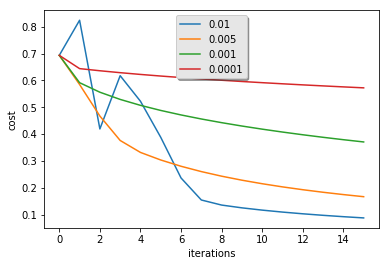

In [7]:
learning_rates = [ 0.01,  0.005, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
#     model = lm.LogisticRegressionModel(iterator=lr.NumberIterator(1500),
#                                        activation=lr.Sigmoid, regularizer=lr.Regularizer(), learning_rate=i,
#                                        initialize_weights=lr.initialize_weights_zero ）
    model = lm.LogisticRegression(num_features=train_X.shape[0], activator=Sigmoid,
                              regularizer=Regularizer(), iterator=NumberIterator(1500), 
                              optimizer=GradientOptimizer(i), initializer=WeightInitializer(),
                              keep_cost_num_epoch=100)    
    model.fit(train_X, train_Y, print_cost=False)  
    models[str(i)] = model
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)].costs), label= str(models[str(i)].optimizer.learning_rate))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

#### Logistic Regression in sklearn

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#examples-using-sklearn-linear-model-logisticregression


In [8]:
from sklearn import linear_model
from sklearn import neighbors
logistic = linear_model.LogisticRegression(C=10000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
knn = neighbors.KNeighborsClassifier()
print(train_Y.T.shape)
logistic = logistic.fit(train_X.T, np.ravel(train_Y))
knn = knn.fit(train_X.T, np.ravel(train_Y))
print(logistic.score(train_X.T, np.ravel(train_Y)))
print(logistic.score(test_X.T, np.ravel(test_Y)))
print(knn.score(train_X.T, np.ravel(train_Y)))
print(knn.score(test_X.T, np.ravel(test_Y)))

# (209, 1)
# 1.0
# 0.72
# 0.813397129187
# 0.58

(209, 1)
1.0
0.72
0.8133971291866029
0.58


#### Generating a dataset

(200, 2)
(200,)


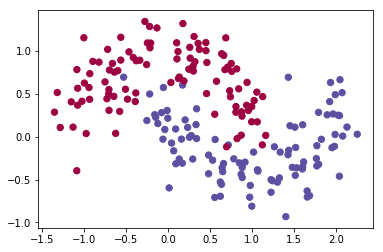

In [9]:
import sklearn  
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
print(X.shape)
print(y.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

#### Logistic Regression

(200, 2) (200,)


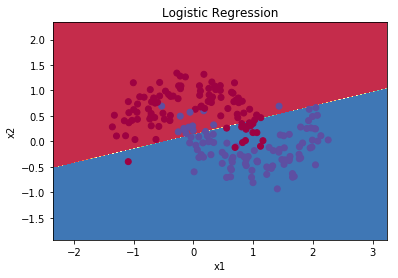

[0.51100238] [[ 1.11875874 -4.00399727]]


0.85

In [16]:
reload(lm)

# Train the logistic rgeression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)
 
# Plot the decision boundary
plt.title("Logistic Regression")
print(X.shape, y.T.shape)
plot_decision_boundary(lambda x: clf.predict(x), X.T, y.reshape(1, len(y)))


print(clf.intercept_, clf.coef_)
clf.score(X, y)

In [20]:
reload(lm)

train_set_x = X.T
train_set_y = y.reshape(y.shape[0],1).T
test_set_x = None
test_set_y = None

model = lm.LogisticRegression(num_features=train_set_x.shape[0], activator=Sigmoid,
                              regularizer=Regularizer(), iterator=NumberIterator(5000), 
                              optimizer=GradientOptimizer(0.1), initializer=WeightInitializer(),
                              keep_cost_num_epoch=1000)

model.fit(train_set_x, train_set_y, print_cost=True, print_num_epoch=1000)   


INFO: Cost after epoch 0: 0.6931471806
INFO: Cost after epoch 1000: 0.3050650564
INFO: Cost after epoch 2000: 0.3000711499
INFO: Cost after epoch 3000: 0.2994684452
INFO: Cost after epoch 4000: 0.2993757073
INFO: Final Cost after epoch 5000: 0.2993601986


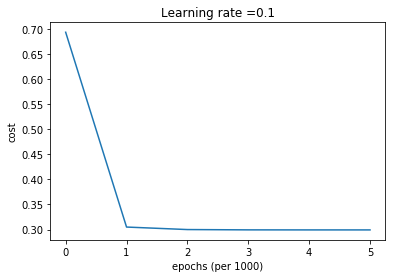

       accuracy     cost  recall  precision  specificity        f1  tp  fn  fp  tn
train     0.845  0.29936    0.84   0.848485         0.85  0.844221  84  16  15  85


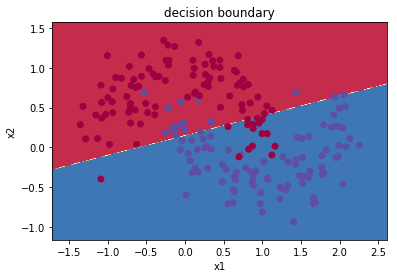

In [19]:
model.plot_costs()
# model.print_accuracy_train_test(train_set_x, train_set_y, test_set_x, test_set_y)
# model.plot_decision_boundary(train_set_x, train_set_y)
# model.plot_costs()
predictor = ClassificationPredictor(model)
predictor.print_metrics(train_set_x, train_set_y, test_set_x, test_set_y)
predictor.plot_decision_boundary(train_set_x, train_set_y) 